In [1]:
%pip install seaborn
%pip install matplotlib
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car_sales = pd.read_csv('data/car_sales/car_sales.csv')

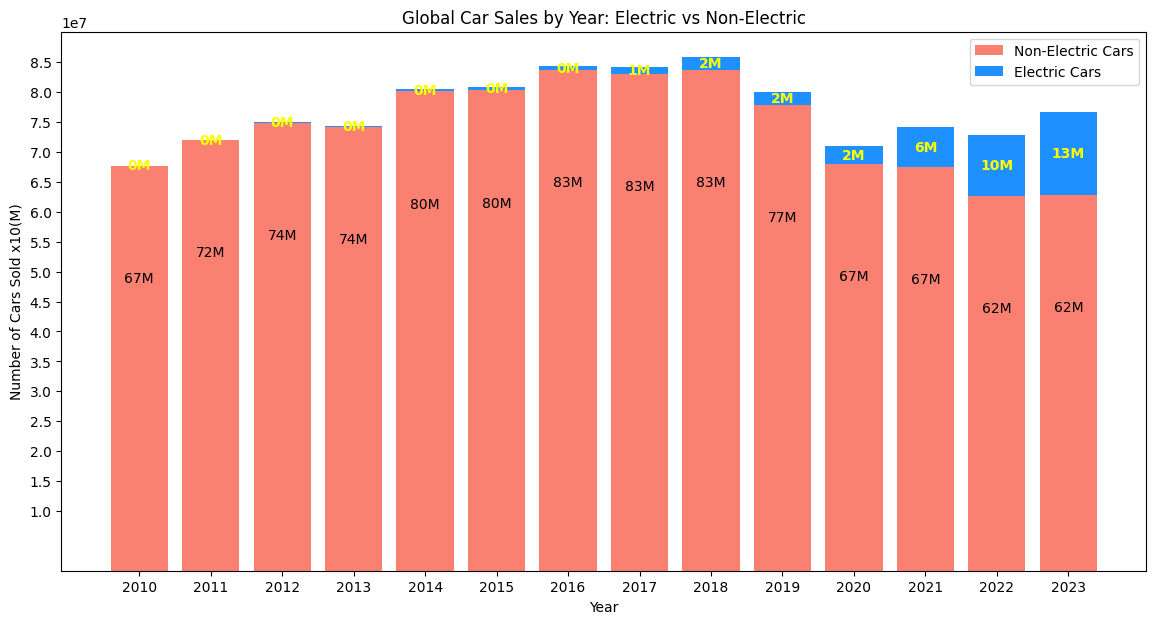

In [3]:
world_data = car_sales[car_sales['Entity'] == 'World']


# Setting the figure size
plt.figure(figsize=(14, 7))

# Plotting the stacked bar plot
plt.bar(world_data['Year'], world_data['Non-electric car sales'], label='Non-Electric Cars', color='salmon')
plt.bar(world_data['Year'], world_data['Electric cars sold'], bottom=world_data['Non-electric car sales'], label='Electric Cars', color='dodgerblue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold x10(M)')
plt.title('Global Car Sales by Year: Electric vs Non-Electric')
plt.legend()

for index, row in world_data.iterrows():
    # Non-electric cars
    plt.text(row['Year'], row['Non-electric car sales'] - 20000000, f'{int(row["Non-electric car sales"]/1000000)}M', ha='center', va='bottom', color='black')
    # Electric cars
    plt.text(row['Year'], row['Non-electric car sales'] + row['Electric cars sold'] / 2, f'{int(row["Electric cars sold"]//1000000)}M', ha='center', va='center', color='yellow', fontweight='bold')
    # Total title
plt.xticks(range(2010, 2024))
plt.yticks(range(10000000, 90000000, 5000000))
# Displaying the plot
plt.show()

            Entity  Electric cars sold  Non-electric car sales
6            China            21775150            2.502297e+08
31   United States             4743800            1.816623e+08
10         Germany             2911340            3.704251e+07
30  United Kingdom             1584238            2.850910e+07
9           France             1541538            2.686397e+07
20          Norway              847060            9.410802e+05
18     Netherlands              769667            6.090571e+06
27          Sweden              682160            3.327180e+06
16           Japan              601415            5.791933e+07
4           Canada              564740            1.781964e+07
25     South Korea              511850            1.362986e+07
15           Italy              487420            1.701081e+07
2          Belgium              470472            6.461688e+06
26           Spain              358530            1.238178e+07
28     Switzerland              275451            3.513

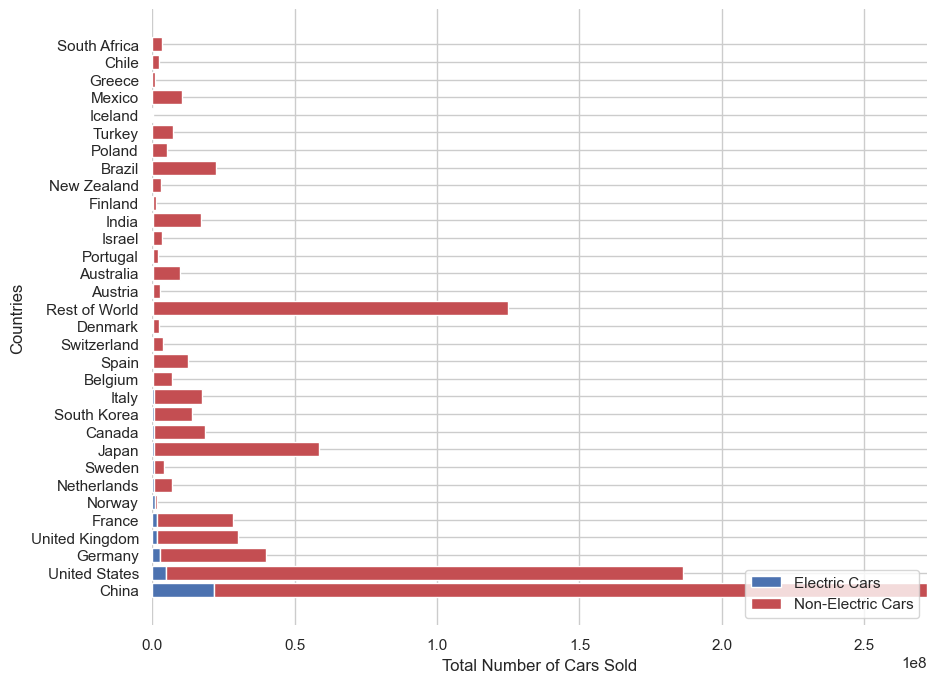

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
car_type_sales = pd.read_csv("data/car_sales/car_sales.csv")

# Filter out aggregated regions (e.g., "World", "Europe")
car_type_sales = car_type_sales[~car_type_sales['Entity'].isin(['World', 'Europe', 'European Union (27)'])]

# Group by each country and calculate the total electric and non-electric cars sold
total_sales = car_type_sales.groupby('Entity')[['Electric cars sold', 'Non-electric car sales']].sum().reset_index()

# Sort by total Electric cars sold
total_sales = total_sales.sort_values("Electric cars sold", ascending=False)
print(total_sales)

# Set the theme for the plot
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Plot the electric cars and non-electric cars sold as horizontal bars
ax.barh(total_sales['Entity'], total_sales['Electric cars sold'], label='Electric Cars', color='b')
ax.barh(total_sales['Entity'], total_sales['Non-electric car sales'], 
        left=total_sales['Electric cars sold'], label='Non-Electric Cars', color='r')

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, total_sales[['Electric cars sold', 'Non-electric car sales']].sum(axis=1).max() + 10000), 
       ylabel="Countries", xlabel="Total Number of Cars Sold")

sns.despine(left=True, bottom=True)

# Display the plot
plt.show()


In [50]:
car_in_use = pd.read_csv("data/electric-car-in-use.csv")

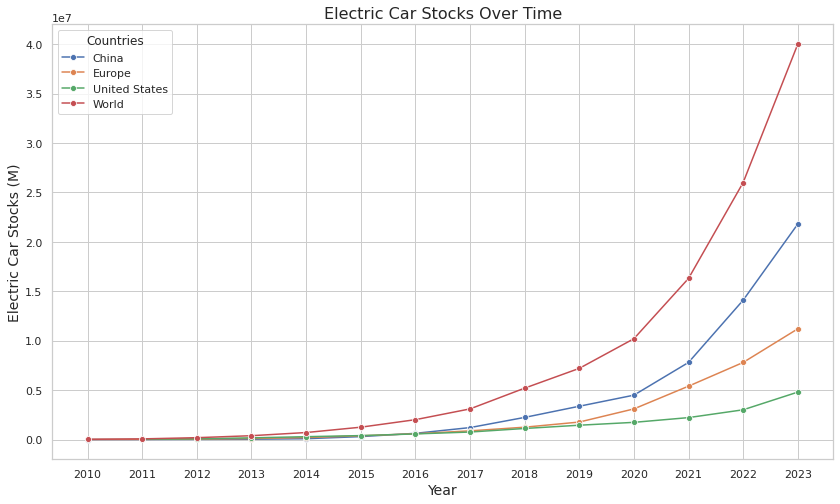

In [61]:
entities_of_interest = ["World", "China", "United States", "Europe"]
filtered_df = car_in_use[car_in_use['Entity'].isin(entities_of_interest)]


# Plot the data
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_df, x="Year", y="Electric car stocks", hue="Entity", marker='o')

# Add title and labels
plt.title("Electric Car Stocks Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Electric Car Stocks (M)", fontsize=14)
plt.legend(title="Countries")
plt.xticks(range(2010, 2024))

# Show plot
plt.show()